# Statistical Learning

## Supervised Learning

### Linear Regression

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  

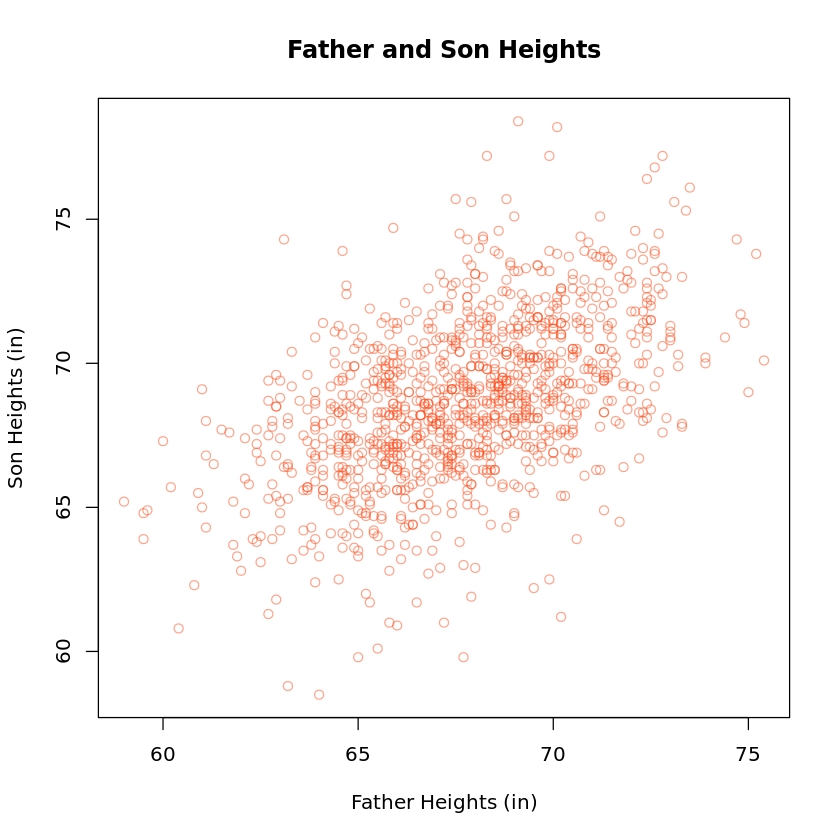

In [1]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

We will fit a linear regression model to this data, with Father Heights (in) as the predictor, and Son Heights (in) as the response.

In [2]:
lmfit<-with(fs_height,lm(sheight~fheight))
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


The summary information this produces contains estimates for the coefficients of the linear regression.

|<center>TASK</center>|
| ---- |
| What is the interpretation of the Estimate for (1) (Intercept), and (2) fheight? |

In the linear regression result formula, fheight=beta0+beta1*sheight+epsilon: 
(1)	The Intercept estimator 33.8928 is the estimate of beta0, which minimizes the sum of the squared residuals. In other words, on the linear regression equation, it is the intercept of the formula. It indicates that the father height is 33.8928 more than 0.51401 times of son height.
(2)	The fheight estimator 0.51401 is the estimate of beta1, which minimizes the sum of the squared residuals. In other words, on the linear regression equation, it is the slope of the formula. It indicates that when the father height increases 1 unit, the son height increase 0.51401 unit.
[ Add your response here! ]

To ensure that the assumptions on our error model are satisfied, we explore the model's *residuals*.

First, let's extract the residuals, plot them, and compute summary statistics.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.891001 -1.536099 -0.009209  0.000000  1.635924  8.989391 

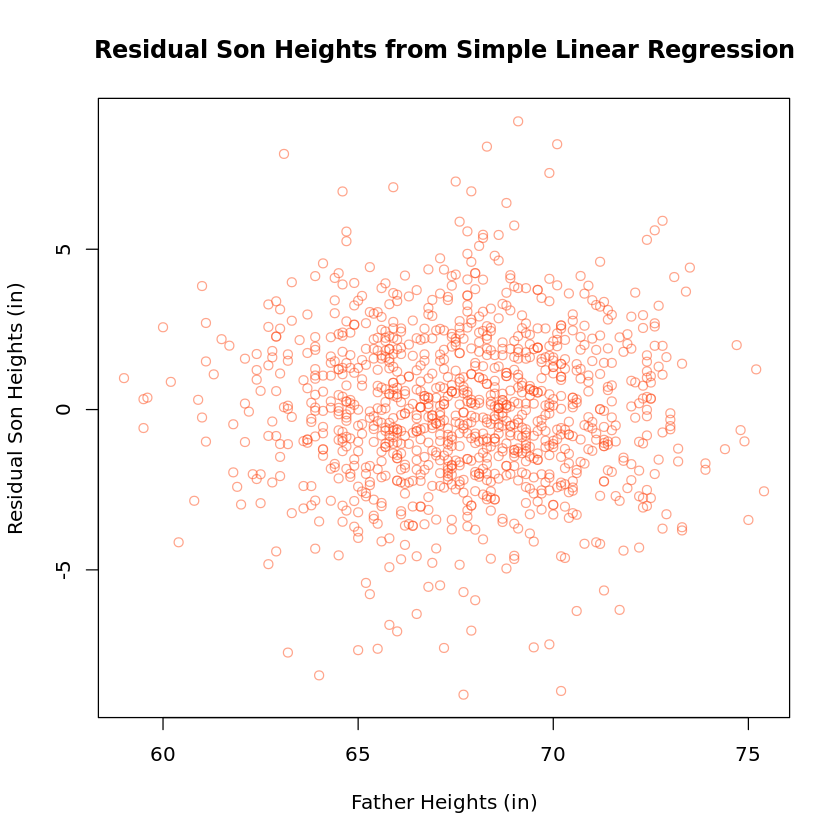

In [3]:
lmfit.res<-resid(lmfit)
plot(fs_height$fheight,lmfit.res,main="Residual Son Heights from Simple Linear Regression", xlab="Father Heights (in)",ylab="Residual Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(lmfit.res)

The three assumptions we need to check are (1) zero mean; (2) constant variance; and (3) normality;

By examining the plot above, Assumption (1) seems reasonable.  Assumption (2) seems to hold for Father Heights in the range from about 63 in to 71 in.  Outside this range, there may be some *heteroscedasticity* (change in the variability).  However, it is relatively mild, and we will proceed as though this assumption is satistfied.

To check Assumption (3), we will create a normal quantile-quantile (qq) plot of the residuals.  If the residuals come from a normal distribution, the qq-plot should show the points approximately on a straight line.

We will create the qq-plot together with a straight-line fit and pointwise 95% confidence intervals.

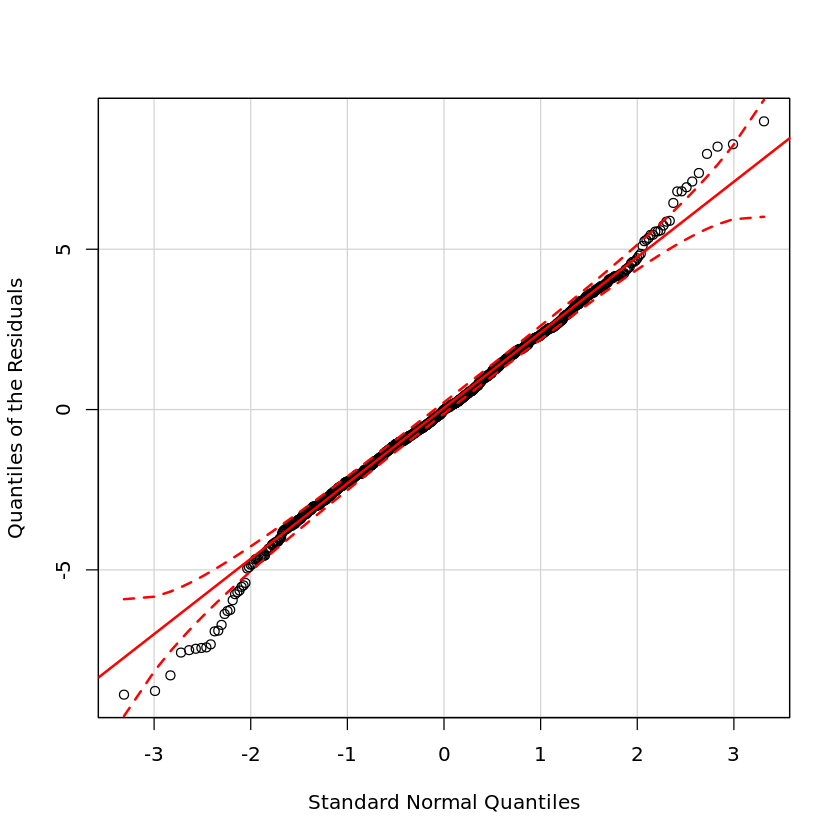

In [4]:
library("car")
qqPlot(lmfit.res,xlab="Standard Normal Quantiles",ylab="Quantiles of the Residuals")

As we can see from the plot, the bulk of the residual quantiles appear to follow a normal distribution, with slightly heavier left and right *tails*, suggesting a mild departure from the Assumption (3).

We can formally test Assumption (3) by carrying out a Shapiro-Wilk *hypothesis test*, whose null hypothesis is that the data come from a normal distribution.

In [5]:
shapiro.test(lmfit.res)


	Shapiro-Wilk normality test

data:  lmfit.res
W = 0.993, p-value = 5.679e-05


Since the p-value is very small, the null hypothesis is very unlikely to be true.  Hence, we reject the null hypothesis in favour of the alternative hypothesis that the data do not come from a normal distribution.  This is in line with our qq-plot suspicion.  However, as previously noted, the departure from normality is mild and we will proceed as though Assumption (3) is satisfied.

Remark: For severe departures from the error model assumptions, one often non-linearly transforms the data first in such a way that the assumptions are satisfied.

Now, let's return to the model summary.

In [6]:
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


Because the p-values for both (Intercept) and fheight are extremely small, this indicates that they are extremely unlikely to be equal to zero.  

|<center>TASK</center>|
| ---- |
| What is the interpretation the R-squared value of 0.2512? |

R-square is the coefficient of multiple determination, with the formula as R = 1 – SSE/SST, where SSE is the sum of squared error and SST is the total sum of squares.
It statistically measures how successful the fit is in explaining the variation of the data. For example, in the case above, model explains about 25.12% of the variation of the data. If the value is closer to 1, it will indicate a better fit of the model.
[ Add your response here! ]

We might wonder about the accuracy of the cofficient estimates.  To that end, we construct 95% confidence intervals for the estimates.

In [7]:
confint(lmfit)

,2.5 %,97.5 %
(Intercept),30.2963477,37.489253
fheight,0.4609158,0.567096


We can also construct confidence intervals for the *regression* that quantify our degree of uncertainty in the regression model itself.

Let's construct a 95% confidence interval for a predictor of 67 in.

In [8]:
predict(lmfit,data.frame(fheight=67),interval="confidence",level = 0.95,type="response")

,fit,lwr,upr
1,68.3312,68.18099,68.4814


|<center>TASK</center>|
| ---- |
| What is the interpretation the fit value of 68.3312? |

The fit value is 68.3312, which indicates that when the father height is 67, what is the son height calculated out according to the linear regression formula.
[ Add your response here! ]

Now, let's construct a plot of the data, the fitted regression line, and a pointwise 95% confidence interval for the regression line.

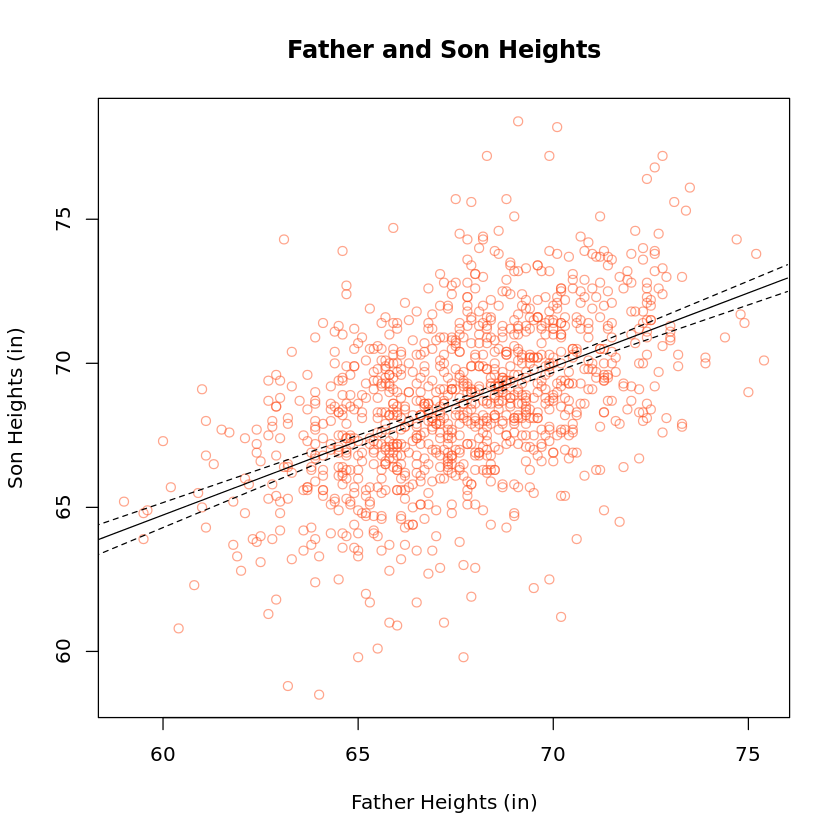

In [9]:
newfheight<-seq(58,76)
lmfitci<-predict(lmfit,data.frame(fheight=newfheight),interval="confidence",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitci[,1],col="black",lty=1)
lines(newfheight,lmfitci[,2],col="black",lty=2)
lines(newfheight,lmfitci[,3],col="black",lty=2)

Frequently, we are more interested in constructing an interval that captures the variability inherent in the residuals.  In other words, what would the typical range of responses be for a particular predictor value.

This is accomplished by constructing *prediction intervals*.  Let's construct a 95% prediction interval for a predictor of 67 in.

In [10]:
predict(lmfit,data.frame(fheight=67),interval="predict",level = 0.95,type="response")

,fit,lwr,upr
1,68.3312,63.5448,73.11759


You will notice immediately that this interval is significantly wider than the confidence interval we computed earlier.

Now, let's construct a plot of the data, the fitted regression line, and a pointwise 95% prediction interval for the regression line.

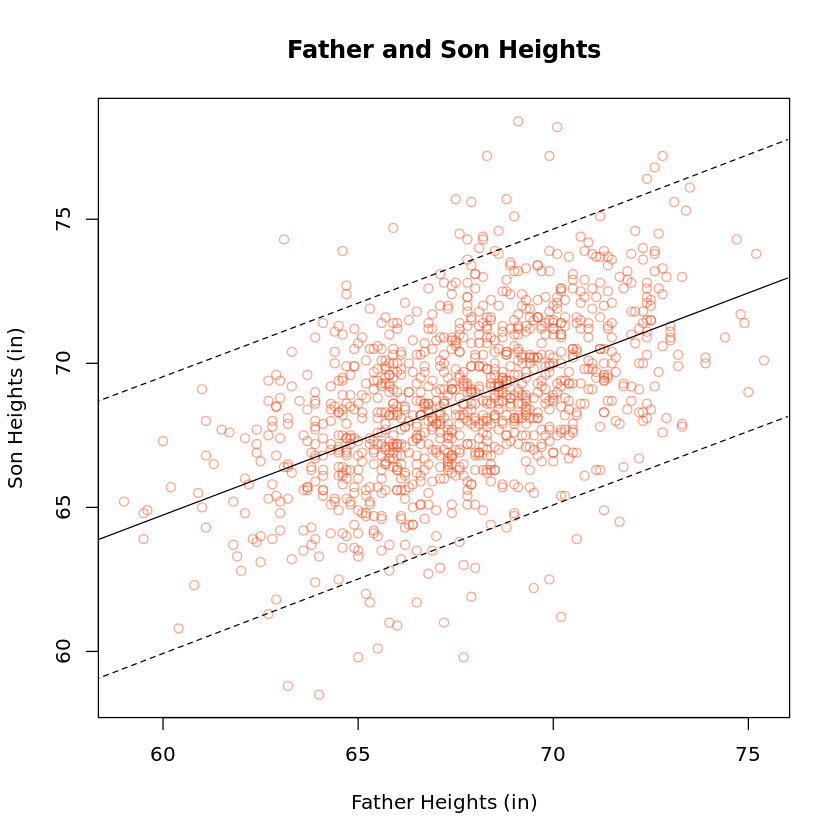

In [11]:
newfheight<-seq(58,76)
lmfitpi<-predict(lmfit,data.frame(fheight=newfheight),interval="prediction",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitpi[,1],col="black",lty=1)
lines(newfheight,lmfitpi[,2],col="black",lty=2)
lines(newfheight,lmfitpi[,3],col="black",lty=2)

### Logistic Regression

Let's return to the HR analytics data from Prac. 3.

To think about trying to predict the likelihood of our best and most experienced employees leaving based on the average monthly hours worked.

To that end, we'll load up the data and subset out the best (evaluation of 0.8 or higher) and the most experienced employees (with the company for 4 or more years).  We'll also create a training and test set.

In [12]:
library("readr")
HR_comma_sep <- read_csv("https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv")
HR_best <- HR_comma_sep[(HR_comma_sep$last_evaluation>=0.8)&(HR_comma_sep$time_spend_company>=4),]
head(HR_best,10)
summary(HR_best)
set.seed(8888) # Set a seed for reproducible random number generator;
trainidx<-sample(nrow(HR_best), floor(nrow(HR_best) * 0.5))
HR_best_train<-HR_best[trainidx,] #Accessing all trainidx rows
HR_best_test<-HR_best[-trainidx,] #Accessing all rows except trainidx


Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_integer(),
  average_montly_hours = col_integer(),
  time_spend_company = col_integer(),
  Work_accident = col_integer(),
  left = col_integer(),
  promotion_last_5years = col_integer(),
  sales = col_character(),
  salary = col_character()
)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.11,0.81,6,305,4,0,1,0,sales,low
0.84,0.92,4,234,5,0,1,0,sales,low
0.78,0.99,4,255,6,0,1,0,sales,low
0.76,0.89,5,262,5,0,1,0,sales,low
0.11,0.83,6,282,4,0,1,0,sales,low


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.8000   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.1100     1st Qu.:0.8500   1st Qu.:4.000   1st Qu.:210.0       
 Median :0.6500     Median :0.9000   Median :5.000   Median :245.0       
 Mean   :0.5323     Mean   :0.9019   Mean   :4.758   Mean   :234.6       
 3rd Qu.:0.8200     3rd Qu.:0.9500   3rd Qu.:6.000   3rd Qu.:267.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident          left       promotion_last_5years
 Min.   : 4.00      Min.   :0.00000   Min.   :0.000   Min.   :0.00000      
 1st Qu.: 4.00      1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.00000      
 Median : 5.00      Median :0.00000   Median :1.000   Median :0.00000      
 Mean   : 4.89      Mean   :0.09688   Mean   :0.581   Mean   :0.01541      
 3rd Qu.: 5.00      3rd Qu.:0.00000   3rd Qu.:1.000   3rd Qu.:0.00000      
 Max.   :10.00      Max.  

Next, we'll plot `left` vs `Average Monthly Hours` in our training set as a scatterplot.

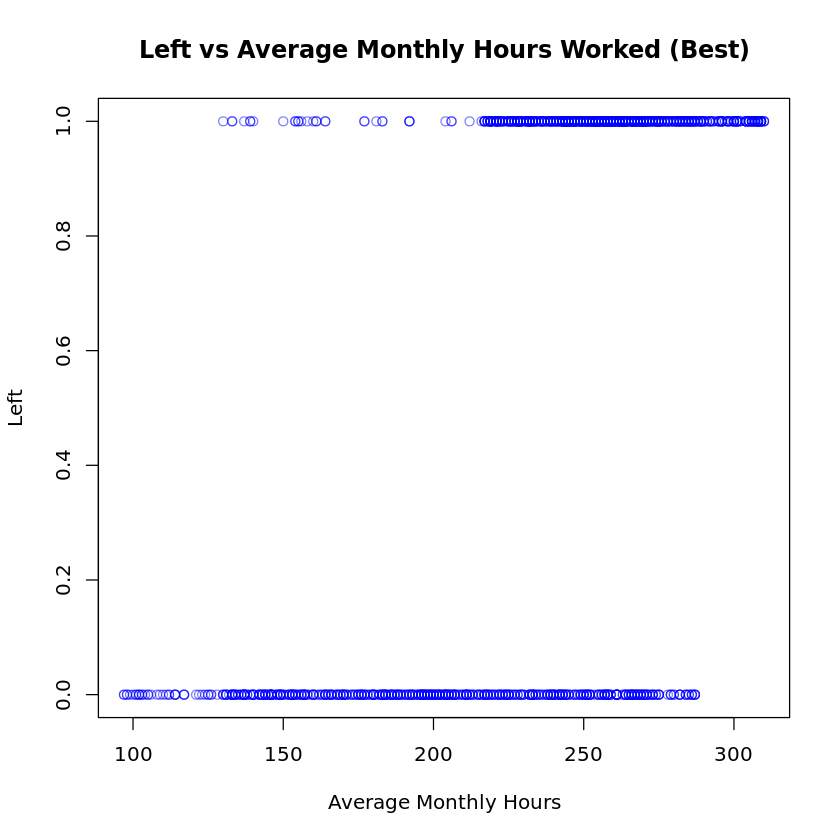

In [13]:
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))

It is clear from this plot that the more hours they work on average, the more likely that the best and most experienced employees will leave.

Let's fit a logistic regression model to the data, and plot the resulting regression curve.


Call:
glm(formula = left ~ average_montly_hours, family = binomial, 
    data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1575  -0.6865   0.4231   0.7786   2.6275  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.09314    0.47513  -17.03   <2e-16 ***
average_montly_hours  0.03595    0.00199   18.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1994.3  on 1459  degrees of freedom
Residual deviance: 1405.3  on 1458  degrees of freedom
AIC: 1409.3

Number of Fisher Scoring iterations: 5


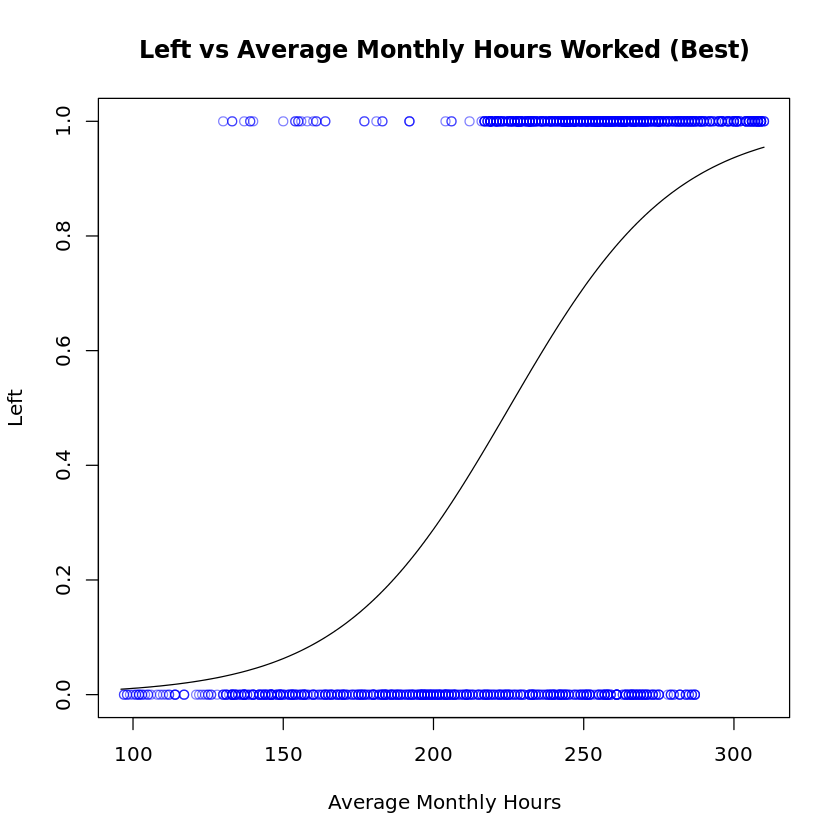

In [14]:
logfit<-glm(left~average_montly_hours,data=HR_best_train,family=binomial)
summary(logfit)
newamh<-seq(96,310)
predprobs<-predict(logfit,data.frame(average_montly_hours=newamh),type="response")
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)

|<center>TASK</center>|
| ---- |
| What is the interpretation of the estimated coefficient for `average_montly_hours` ? |

The estimated coefficient for average_montly_hours is 0.03595. It is the weight of average_montly_hours and measures that 1 unit increase on average_monthly_hours contributes 0.03595 unit to the change of the final result of 'left' category.
[ Add your response here! ]

### Classification

We can use a threshold together with the regression curve to create two groups.  We can also observe the training error and test error we make.

Let's start with a threshold of 0.5.

In [15]:
HR_best_train$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_train$average_montly_hours),type="response")
HR_best_train$predleft<-as.integer(HR_best_train$probs>=0.5)
table(HR_best_train$predleft,HR_best_train$left)

HR_best_test$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_test$average_montly_hours),type="response")
HR_best_test$predleft<-as.integer(HR_best_test$probs>=0.5)
table(HR_best_test$predleft,HR_best_test$left)

   
      0   1
  0 416  86
  1 210 748

   
      0   1
  0 375  75
  1 223 788

|<center>TASK</center>|
| ---- |
| What are the (1) error rate, (2) sensitivity, (3) specificity, and (4) precision in Training and Testing for this classifier? |

Assume positive means left is 1, and negative means left is 0.
For training set: 
(1)error rate = (TP+TN)/(TP+TN+FP+FN)=(86+210)/(748+416+210+86)=0.202739726027397
(2)sensitivity = TP/(TP+FN)=748/(748+86)=0.896882494004796
(3)specificity = TN/(TN+FP)=416/(416+210)=0.664536741214057
(4)precision = TP/(TP+FP)=748/(748+210)=0.780793319415449

For test set: 
(1)error rate = (TP+TN)/(TP+TN+FP+FN) = (75+223)/(375+788+223+75)=0.203969883641342
(2)sensitivity = TP/(TP+FN)=788/(788+75)=0.913093858632677
(3)specificity = TN/(TN+FP)=375/(375+223)=0.627090301003345
(4)precision = TP/(TP+FP)=788/(788+223)=0.779426310583581
[ Add your response here! ]

The quantities we computed above were just for a single choice of threshold.  We can gauge the tradeoff between true positive rates (sensitivity) and false positive rates (1-specificity) by constructing an ROC curve.

We'll do this now for both the training data, as well as computing the AUC.

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.8280602

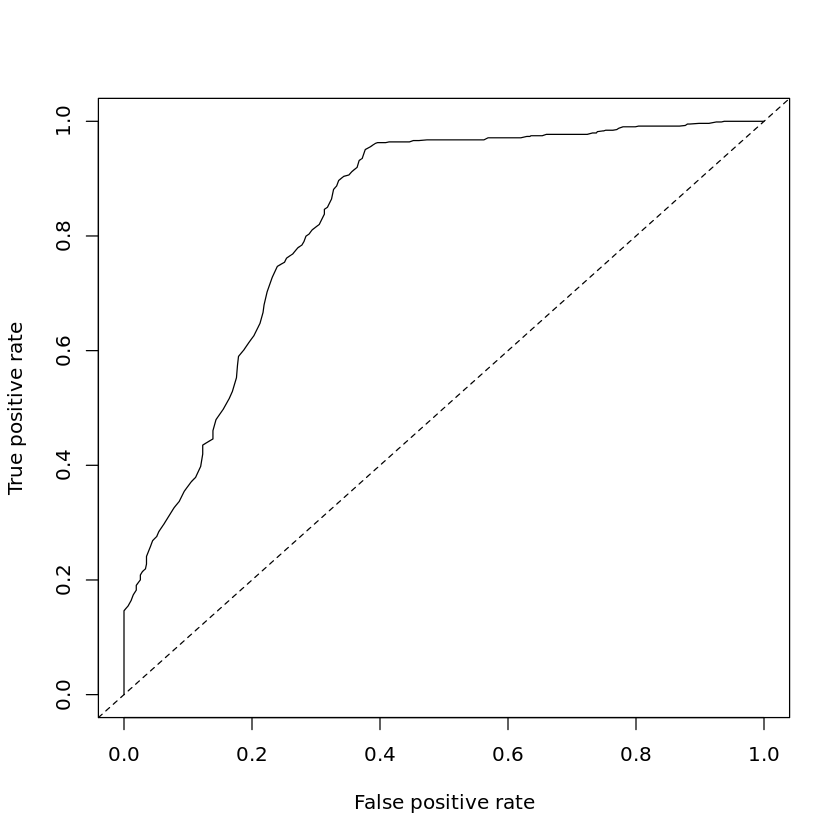

In [16]:
library("ROCR")
trainROC<-performance(prediction(HR_best_train$probs,HR_best_train$left),"tpr","fpr")
plot(trainROC)
abline(a=0, b= 1,lty=2)
trainAUC<-as.double(performance(prediction(HR_best_train$probs,HR_best_train$left),"auc")@y.values)
trainAUC

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data, and compute the AUC. |

[1] 0.8313294

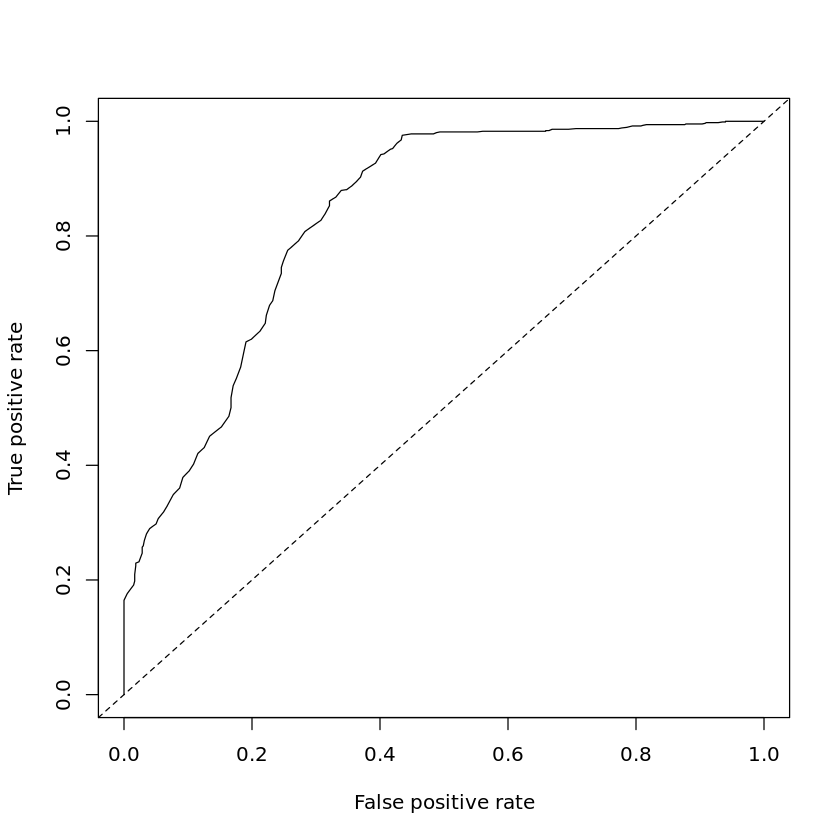

In [17]:
# Write your code here
library("ROCR")
testROC<-performance(prediction(HR_best_test$probs,HR_best_test$left),"tpr","fpr")
plot(testROC)
abline(a=0, b= 1,lty=2)
testAUC<-as.double(performance(prediction(HR_best_test$probs,HR_best_test$left),"auc")@y.values)
testAUC

Of course, we have been ignoring all of the other predictors so far.

It is simple enough to modify the logistic regression to include others we have identified as important from Prac. 3.

Let's include satisfaction level, number of projects, and their interactions.

In [18]:
logfit2<-glm(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train,family=binomial)
summary(logfit2)


Call:
glm(formula = left ~ average_montly_hours * satisfaction_level * 
    number_project, family = binomial, data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0415  -0.4736   0.1602   0.6028   3.3437  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                             12.502769   4.928151
average_montly_hours                                    -0.101635   0.022492
satisfaction_level                                     -14.449688   7.765767
number_project                                          -3.618368   1.016518
average_montly_hours:satisfaction_level                  0.098241   0.034729
average_montly_hours:number_project                      0.024108   0.004455
satisfaction_level:number_project                        2.149072   1.686000
average_montly_hours:satisfaction_level:number_project  -0.014013   0.007359
                                            

Whilst the interpretation of the estimated coefficients becomes trickier for this model, for this practical we're only interested in its classification performance.

Let's evaluate the training performance of the classifier associated with this more complicated logistic regression model.

[1] 0.9064911

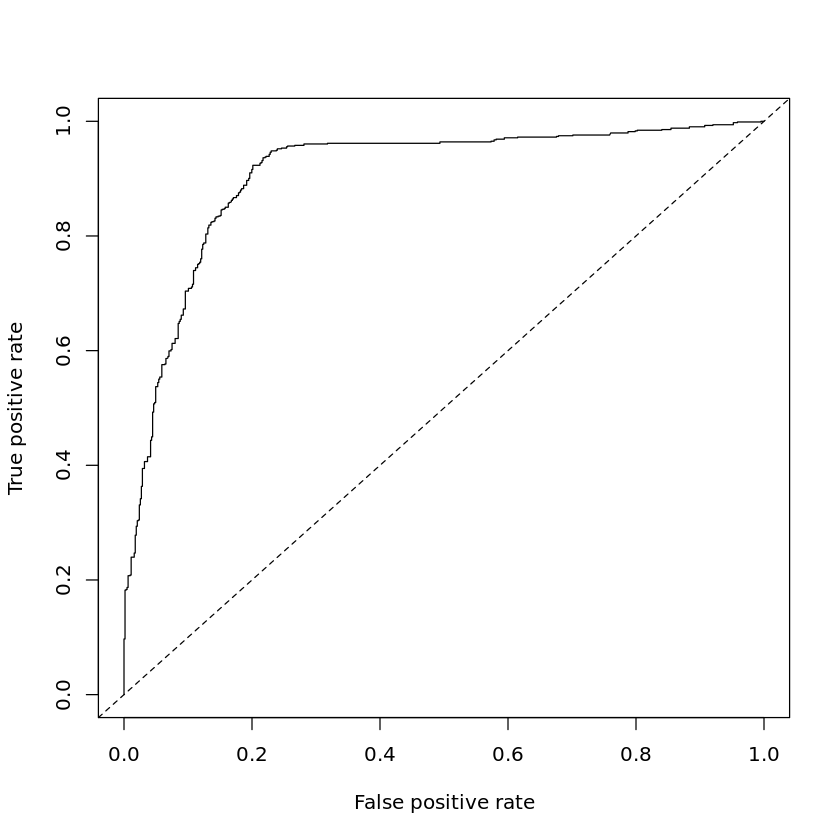

In [19]:
HR_best_train$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_train$average_montly_hours,satisfaction_level=HR_best_train$satisfaction_level,number_project=HR_best_train$number_project),type="response")
trainROC2<-performance(prediction(HR_best_train$probs2,HR_best_train$left),"tpr","fpr")
plot(trainROC2)
abline(a=0, b= 1,lty=2)
trainAUC2<-as.double(performance(prediction(HR_best_train$probs2,HR_best_train$left),"auc")@y.values)
trainAUC2

Of course, the model fitted using more predictors produces a better classifier for the training data.

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data and compute the AUC for the new logistic regression model. What do you observe?  Comment on one potential pitfall associated with more complex models. |

[1] 0.9188566

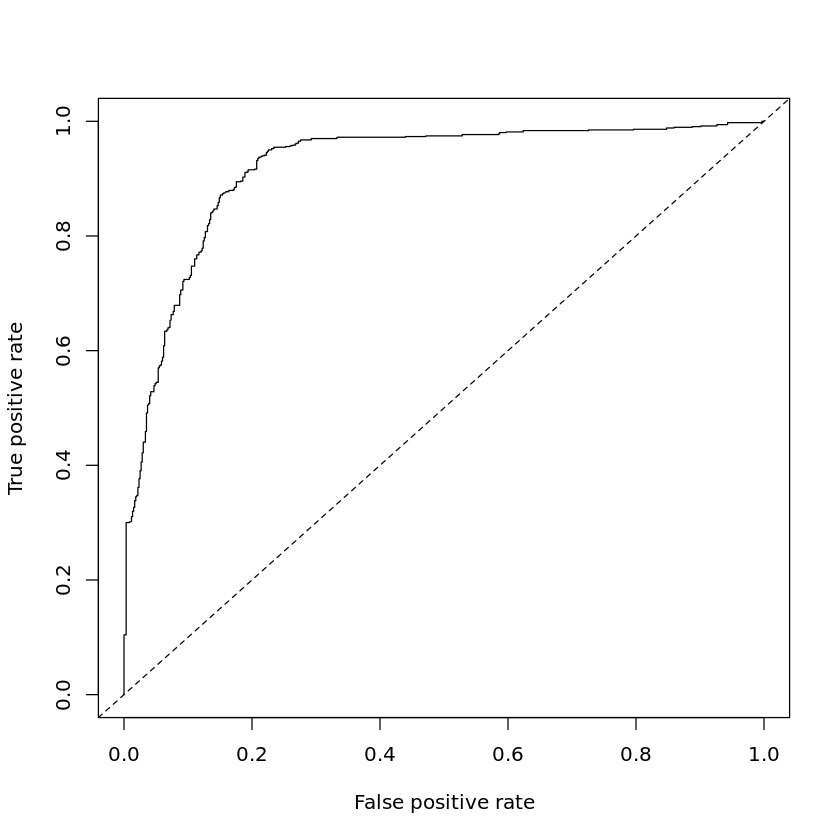

In [20]:
# Write your code here
HR_best_test$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
testROC2<-performance(prediction(HR_best_test$probs2,HR_best_test$left),"tpr","fpr")
plot(testROC2)
abline(a=0, b= 1,lty=2)
testAUC2<-as.double(performance(prediction(HR_best_test$probs2,HR_best_test$left),"auc")@y.values)
testAUC2

With incresing the false positive rate, the true positive rate sharply increses at begining, and slightly increases after reaching a special level. It indicates that with incresing the false positive rate, the affect of it on true positive rate decreases. 
[ Add your response here! ]

### Other Classification Techniques

It is relatively easy to carry out classification using other supervised learning techniques.

Let's construct an LDA-based classifier using the three predictors and their interactions we had before, and evaluate it on our test data.

[1] 0.9130493

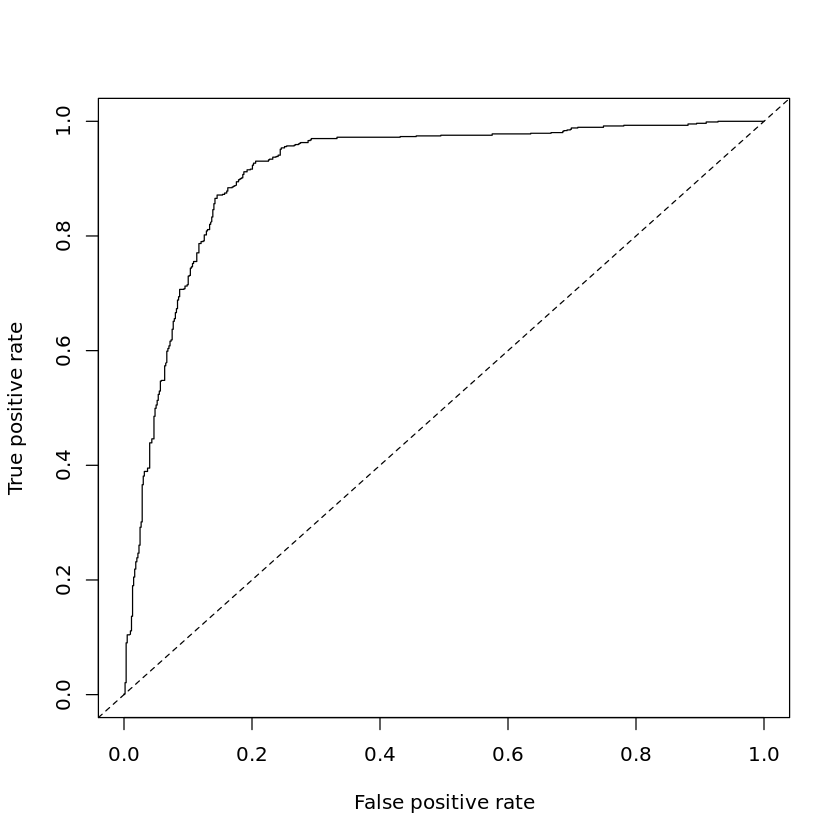

In [21]:
library("MASS")
ldafit<-lda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(ldafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs3<-temp$posterior[,2]
testROC3<-performance(prediction(HR_best_test$probs3,HR_best_test$left),"tpr","fpr")
plot(testROC3)
abline(a=0, b= 1,lty=2)
testAUC3<-as.double(performance(prediction(HR_best_test$probs3,HR_best_test$left),"auc")@y.values)
testAUC3

Note that, usually, LDA classification is carried out on a *maximum a posteriori* basis.  For two categories, this is the same as setting the threshold to be 0.5.

In addition to linear discriminant analysis, the `MASS` package has support for quadratic discriminant analysis via the command `qda`.  The `class` package has support for K nearest neighbours via `knn` and the `e1071` package has support for support vector machines via `svm`.

We've installed all of these packages for this practical.

|<center>TASK</center>|
| ---- |
| Choose **one** of the other classification techniques, train it to classify `left` from your training data, and test its performance on your test data.  Comment on how your classifier performs relative to the three simple classifiers we've explored in this part of the practical. |

[1] 0.9361293

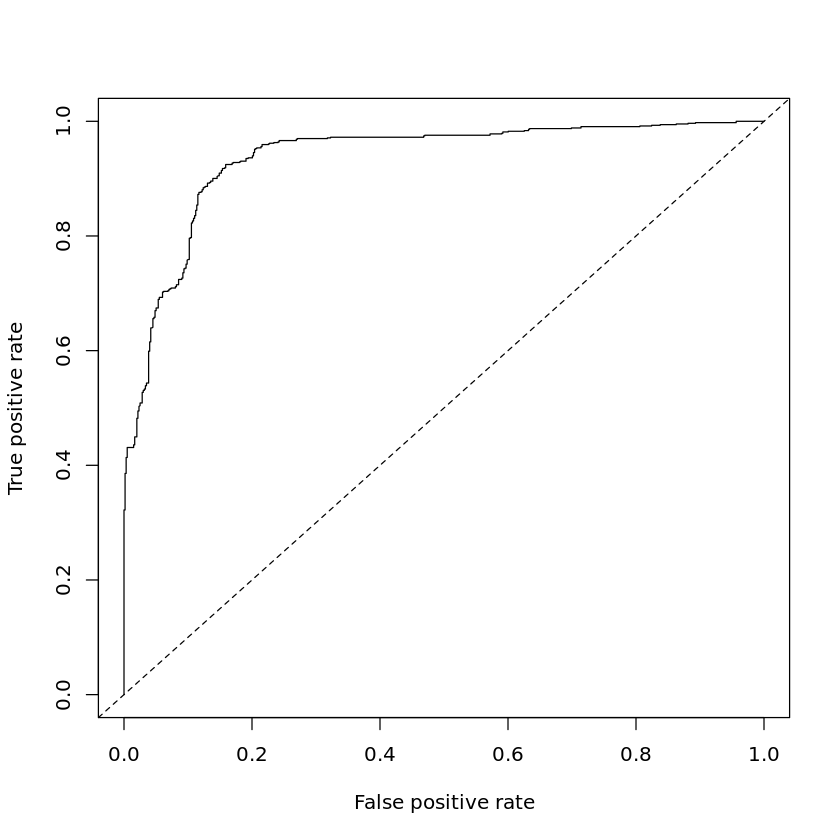

In [25]:
# Write your code here
library("MASS")
qdafit<-qda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(qdafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs4<-temp$posterior[,2]
testROC4<-performance(prediction(HR_best_test$probs4,HR_best_test$left),"tpr","fpr")
plot(testROC4)
abline(a=0, b= 1,lty=2)
testAUC4<-as.double(performance(prediction(HR_best_test$probs4,HR_best_test$left),"auc")@y.values)
testAUC4

The correctness ratio of QDA classification is round 0.9361, which indicates that 93.61% of the classification result is same as the original classification condition. The result of QDA classification is better than LDA(0.9130) and other classification method mentioned above.

Quadratic discriminant analysis is a modification of LDA that does not assume equal covariance matrices amongst the groups.When the covirance matrix is various, which means that they come from different population, the analysis adopts the prepared data and completes the second fitting based on the previous fitting result.
[ Add your response here! ]

## Unsupervised Learning

As a final exercise, let's subset all of our employee data again (not only best) to only include those that have left.

In Prac. 3, we visually identified several *clusters* of leavers.  We will now use the k-means clustering algorithm to capture these clusters.

In [22]:
HR_left<-HR_comma_sep[HR_comma_sep$left==1,]
head(HR_left)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


Now, let's focus on three variables: average monthly hours, satisfaction level, and last evaluation.

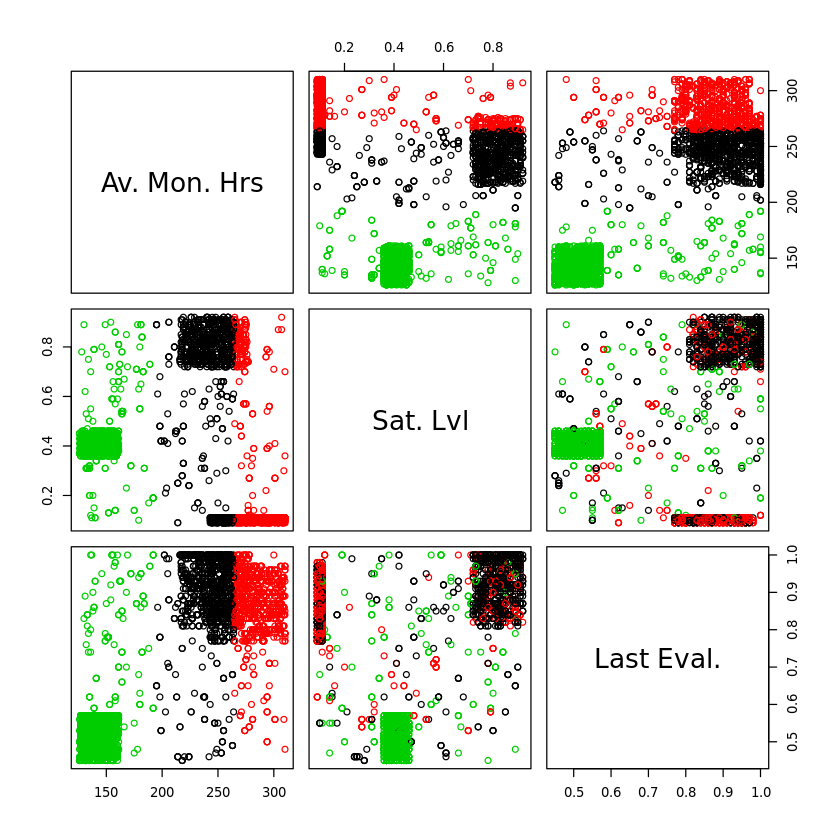

In [23]:
library("ggplot2") # Expanded plotting functionality over "lattice" package
x<-cbind(HR_left$average_montly_hours,HR_left$satisfaction_level,HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random restarts
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

One thing you will notice is that the three clusters that are found are not what we would expect.

This is because the variables are on different scales; since average monthly hours takes on values so much larger than  satisfaction level and last evaluation, the algorithm effectively prioritises just this variable.

A quick remedy to this problem is achieved by adjusting the scale of satisfaction level and last evaluation by a factor of 100.

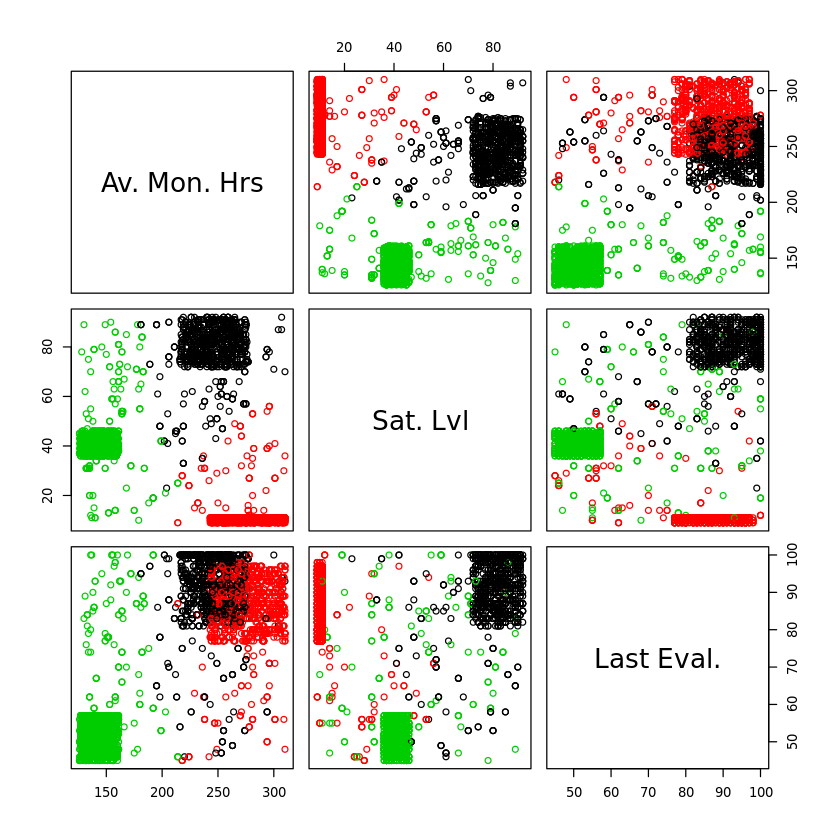

In [55]:
x<-cbind(HR_left$average_montly_hours,100*HR_left$satisfaction_level,100*HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random restarts
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

|<center>TASK</center>|
| ---- |
| Partition the dataset into the three clusters we have just identified.  Use quantitative and visual EDA to explore the typical characteristics of each cluster.  Based on this, what is a possible explanation for the clusters? |

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,kmfit_cluster
2,0.80,0.86,5,262,6,0,1,0,sales,medium,1
4,0.72,0.87,5,223,5,0,1,0,sales,low,1
8,0.92,0.85,5,259,5,0,1,0,sales,low,1
9,0.89,1.00,5,224,5,0,1,0,sales,low,1
13,0.84,0.92,4,234,5,0,1,0,sales,low,1
18,0.78,0.99,4,255,6,0,1,0,sales,low,1
20,0.76,0.89,5,262,5,0,1,0,sales,low,1
26,0.89,0.92,5,242,5,0,1,0,sales,low,1
27,0.82,0.87,4,239,5,0,1,0,sales,low,1
35,0.84,0.87,4,246,6,0,1,0,hr,low,1


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,kmfit_cluster
3,0.11,0.88,7,272,4,0,1,0,sales,medium,2
7,0.10,0.77,6,247,4,0,1,0,sales,low,2
12,0.11,0.81,6,305,4,0,1,0,sales,low,2
21,0.11,0.83,6,282,4,0,1,0,sales,low,2
23,0.09,0.95,6,304,4,0,1,0,sales,low,2
31,0.09,0.62,6,294,4,0,1,0,accounting,low,2
36,0.10,0.94,6,255,4,0,1,0,technical,low,2
39,0.11,0.89,6,306,4,0,1,0,technical,low,2
44,0.10,0.80,7,281,4,0,1,0,technical,low,2
45,0.09,0.89,6,276,4,0,1,0,technical,low,2


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,kmfit_cluster
1,0.38,0.53,2,157,3,0,1,0,sales,low,3
5,0.37,0.52,2,159,3,0,1,0,sales,low,3
6,0.41,0.50,2,153,3,0,1,0,sales,low,3
10,0.42,0.53,2,142,3,0,1,0,sales,low,3
11,0.45,0.54,2,135,3,0,1,0,sales,low,3
14,0.41,0.55,2,148,3,0,1,0,sales,low,3
15,0.36,0.56,2,137,3,0,1,0,sales,low,3
16,0.38,0.54,2,143,3,0,1,0,sales,low,3
17,0.45,0.47,2,160,3,0,1,0,sales,low,3
19,0.45,0.51,2,160,3,1,1,1,sales,low,3


 satisfaction_level last_evaluation  number_project average_montly_hours
 Min.   :0.2300     Min.   :0.4600   Min.   :2.00   Min.   :181.0       
 1st Qu.:0.7600     1st Qu.:0.8600   1st Qu.:4.00   1st Qu.:232.0       
 Median :0.8150     Median :0.9200   Median :5.00   Median :246.0       
 Mean   :0.7987     Mean   :0.9037   Mean   :4.51   Mean   :245.7       
 3rd Qu.:0.8700     3rd Qu.:0.9800   3rd Qu.:5.00   3rd Qu.:260.0       
 Max.   :0.9200     Max.   :1.0000   Max.   :7.00   Max.   :310.0       
 time_spend_company Work_accident         left   promotion_last_5years
 Min.   :2.000      Min.   :0.0000   Min.   :1   Min.   :0.000000     
 1st Qu.:5.000      1st Qu.:0.0000   1st Qu.:1   1st Qu.:0.000000     
 Median :5.000      Median :0.0000   Median :1   Median :0.000000     
 Mean   :5.041      Mean   :0.0502   Mean   :1   Mean   :0.001025     
 3rd Qu.:5.000      3rd Qu.:0.0000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.0000   Max.   :1   Max.   :1.0000

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.4500   Min.   :2.000   Min.   :214.0       
 1st Qu.:0.1000     1st Qu.:0.8100   1st Qu.:6.000   1st Qu.:259.0       
 Median :0.1000     Median :0.8700   Median :6.000   Median :278.0       
 Mean   :0.1159     Mean   :0.8552   Mean   :6.089   Mean   :276.5       
 3rd Qu.:0.1100     3rd Qu.:0.9200   3rd Qu.:7.000   3rd Qu.:293.0       
 Max.   :0.5600     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left   promotion_last_5years
 Min.   :2.000      Min.   :0.0000   Min.   :1   Min.   :0.000000     
 1st Qu.:4.000      1st Qu.:0.0000   1st Qu.:1   1st Qu.:0.000000     
 Median :4.000      Median :0.0000   Median :1   Median :0.000000     
 Mean   :4.072      Mean   :0.0443   Mean   :1   Mean   :0.003165     
 3rd Qu.:4.000      3rd Qu.:0.0000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.0000   Max.   :1   Max.   

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.1000     Min.   :0.4500   Min.   :2.000   Min.   :126         
 1st Qu.:0.3800     1st Qu.:0.4800   1st Qu.:2.000   1st Qu.:135         
 Median :0.4100     Median :0.5100   Median :2.000   Median :145         
 Mean   :0.4143     Mean   :0.5292   Mean   :2.182   Mean   :145         
 3rd Qu.:0.4400     3rd Qu.:0.5500   3rd Qu.:2.000   3rd Qu.:154         
 Max.   :0.9000     Max.   :1.0000   Max.   :7.000   Max.   :214         
 time_spend_company Work_accident          left   promotion_last_5years
 Min.   :2.000      Min.   :0.00000   Min.   :1   Min.   :0.000000     
 1st Qu.:3.000      1st Qu.:0.00000   1st Qu.:1   1st Qu.:0.000000     
 Median :3.000      Median :0.00000   Median :1   Median :0.000000     
 Mean   :3.074      Mean   :0.04736   Mean   :1   Mean   :0.009107     
 3rd Qu.:3.000      3rd Qu.:0.00000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.00000   Max.   :1   

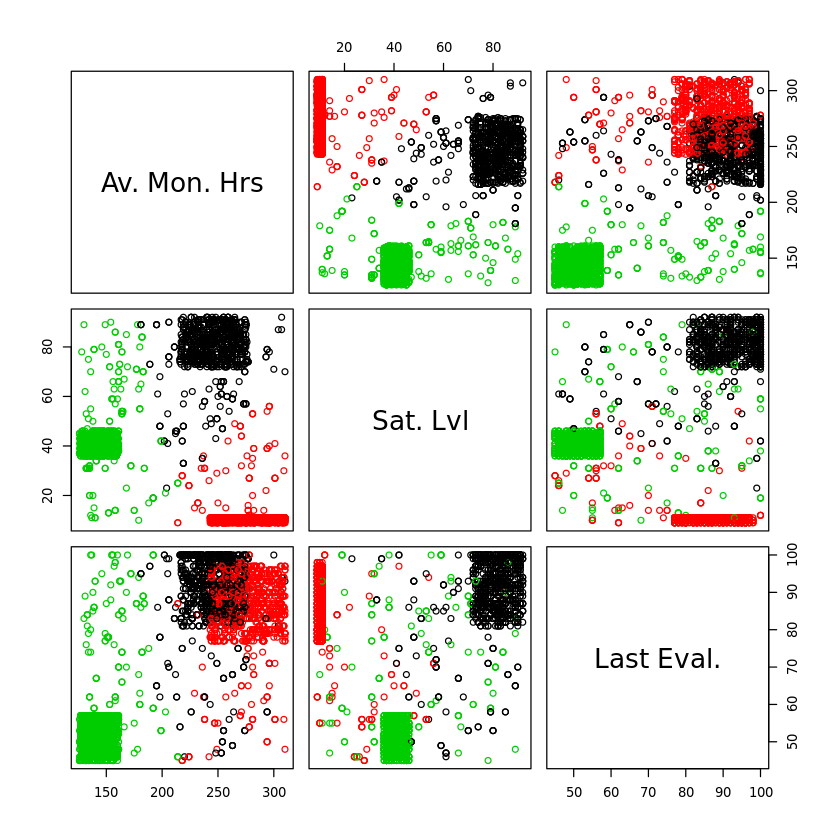

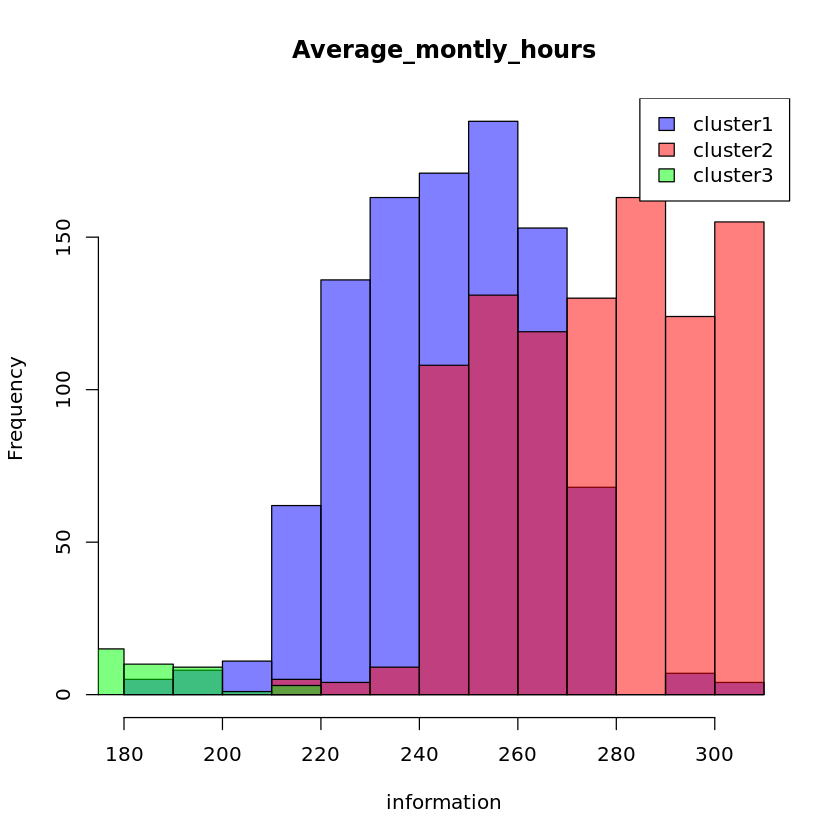

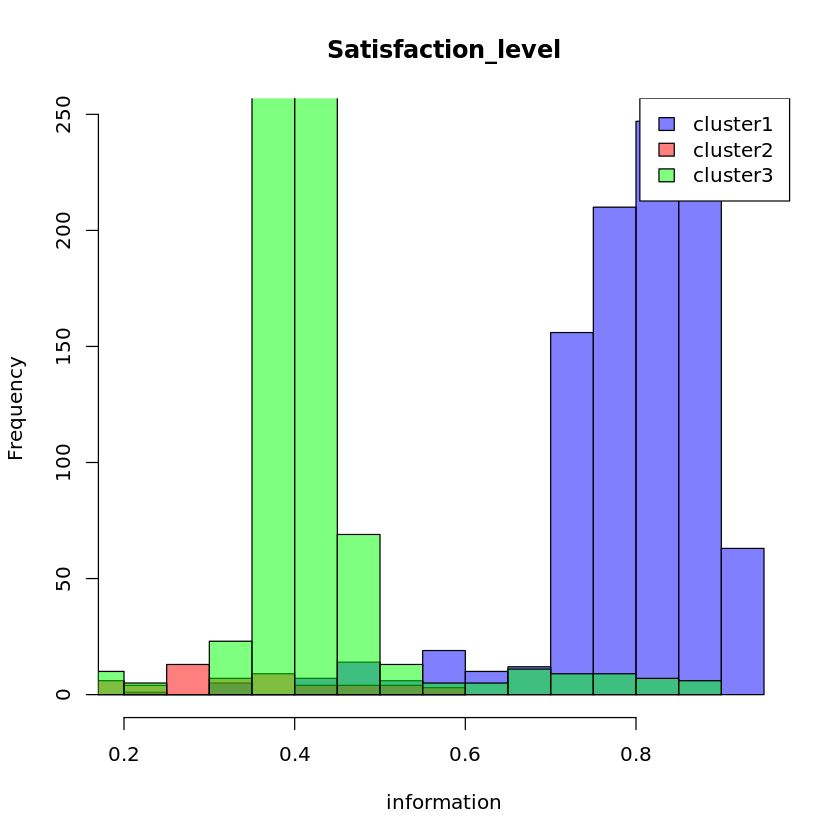

[1]  976  948 1647

     
       1  2  3
  126  0  0 10
  127  0  0 57
  128  0  0 47
  129  0  0 47
  130  0  0 42
  131  0  0 46
  132  0  0 48
  133  0  0 22
  134  0  0 38
  135  0  0 75
  136  0  0 48
  137  0  0 44
  138  0  0 36
  139  0  0 34
  140  0  0 47
  141  0  0 43
  142  0  0 36
  143  0  0 53
  144  0  0 35
  145  0  0 54
  146  0  0 42
  147  0  0 50
  148  0  0 51
  149  0  0 54
  150  0  0 27
  151  0  0 58
  152  0  0 38
  153  0  0 44
  154  0  0 46
  155  0  0 54
  156  0  0 62
  157  0  0 44
  158  0  0 50
  159  0  0 46
  160  0  0 46
  161  0  0 19
  162  0  0  2
  163  0  0  1
  164  0  0  8
  165  0  0  1
  166  0  0  1
  168  0  0  2
  169  0  0  1
  172  0  0  3
  175  0  0  2
  177  0  0  3
  178  0  0  1
  179  0  0  2
  180  0  0  4
  181  3  0  1
  182  0  0  3
  183  0  0  3
  184  0  0  2
  188  0  0  1
  189  2  0  0
  192  0  0  6
  195  3  0  0
  196  1  0  0
  198  4  0  0
  199  0  0  3
  202  2  0  0
  203  0  0  1
  204  1  0  0
  205  2  0  0
  206  6  0  0
  21

      
         1   2   3
  0.09   0 195   0
  0.1    0 357   1
  0.11   0 332   3
  0.12   0   3   1
  0.13   0   0   3
  0.14   0   5   5
  0.15   0   2   1
  0.16   0   1   0
  0.17   0   4   1
  0.19   0   0   6
  0.2    0   1   3
  0.21   0   0   1
  0.22   0   1   0
  0.23   1   0   1
  0.24   0   3   0
  0.25   0   0   3
  0.26   0   1   0
  0.27   0   6   0
  0.28   0   3   0
  0.29   0   1   0
  0.3    0   2   0
  0.31   0   4  13
  0.32   0   2   6
  0.33   3   0   0
  0.34   0   0   4
  0.35   2   1   0
  0.36   0   3  93
  0.37   0   0 194
  0.38   0   0 154
  0.39   0   5 135
  0.4    0   1 168
  0.41   1   1 130
  0.42   4   1 103
  0.43   1   0 177
  0.44   0   2 151
  0.45   1   0 156
  0.46   3   0  65
  0.47   3   0   1
  0.48   7   3   0
  0.49   1   1   0
  0.5    0   0   3
  0.51   4   0   1
  0.53   1   3   4
  0.54   1   1   4
  0.55   0   0   4
  0.56   2   3   0
  0.57   7   0   1
  0.58   3   0   0
  0.59   3   0   4
  0.6    4   0   0
  0.61   6   0   0
  0.6

      
         1   2   3
  0.45   0   3  62
  0.46   1   4 157
  0.47   4   0 109
  0.48   0   2 134
  0.49   3   0 110
  0.5    3   3 131
  0.51   0   0 129
  0.52   0   0 114
  0.53   6   0 115
  0.54   2   3 143
  0.55   0   4 106
  0.56   1  10 112
  0.57   0   3 120
  0.58   6   1   1
  0.59   0   0   6
  0.6    1   1   5
  0.61   0   1   1
  0.62   6   5   6
  0.63   0   2   1
  0.65   3   4   0
  0.66   0   0   2
  0.67   3   0   3
  0.68   4   2   1
  0.7    5   2   4
  0.71   4   4   0
  0.72   3   0   0
  0.73   1   2   0
  0.74   0   1   8
  0.75   6   2   1
  0.76   0   0   2
  0.77   1  42   2
  0.78   4  26   6
  0.79   0  42   2
  0.8    0  50   1
  0.81  13  35   1
  0.82  21  24   0
  0.83  34  52   2
  0.84  37  61   5
  0.85  47  46   4
  0.86  40  34   4
  0.87  63  60   6
  0.88  35  25   1
  0.89  32  49   4
  0.9   37  43   2
  0.91  39  32   0
  0.92  61  36   1
  0.93  41  49   5
  0.94  31  49   1
  0.95  37  40   4
  0.96  27  40   0
  0.97  40  43   1
  0.9

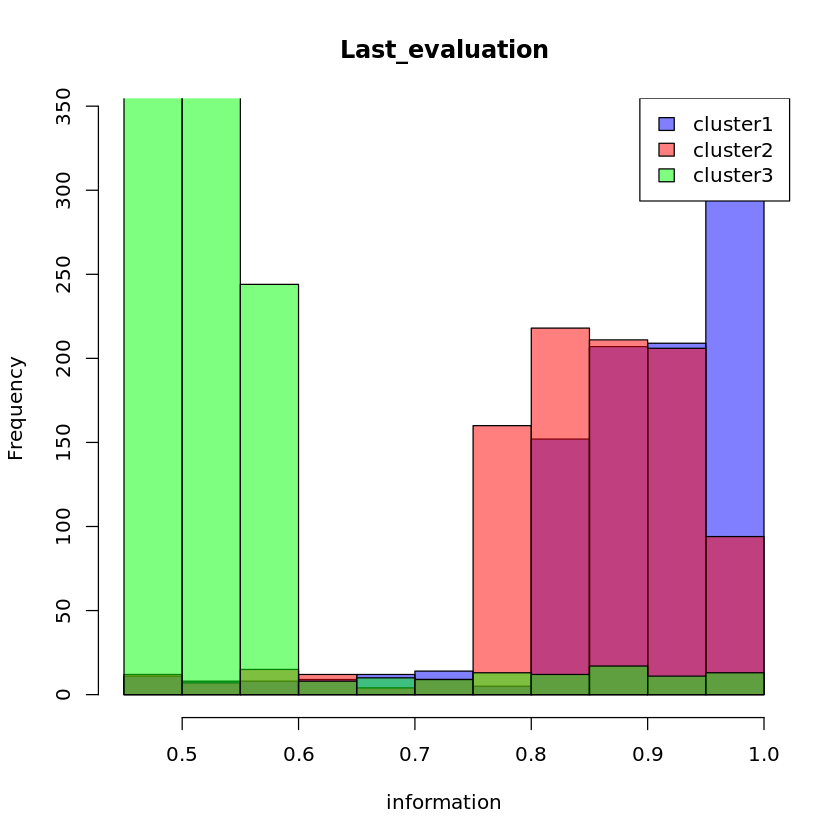

In [79]:
# Write your code here
HR_left_with_cluster = data.frame(HR_left, kmfit$cluster)
colnames(HR_left_with_cluster)[11:11]<-c("kmfit_cluster")
cluster1 = HR_left_with_cluster[which(HR_left_with_cluster$kmfit_cluster == "1"),]
cluster2 = HR_left_with_cluster[which(HR_left_with_cluster$kmfit_cluster == "2"),]
cluster3 = HR_left_with_cluster[which(HR_left_with_cluster$kmfit_cluster == "3"),]
cluster1
cluster2
cluster3
summary(cluster1)
summary(cluster2)
summary(cluster3)
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

hist(cluster1$average_montly_hours, col=rgb(0,0,1,0.5),main="Average_montly_hours", xlab="information")
hist(cluster2$average_montly_hours, col=rgb(1,0,0,0.5),add=TRUE)
hist(cluster3$average_montly_hours, col=rgb(0,1,0,0.5),add=TRUE)
legend("topright", c("cluster1","cluster2","cluster3"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5),rgb(0,1,0,0.5)))

hist(cluster1$satisfaction_level, col=rgb(0,0,1,0.5),main="Satisfaction_level", xlab="information")
hist(cluster2$satisfaction_level, col=rgb(1,0,0,0.5),add=TRUE)
hist(cluster3$satisfaction_level, col=rgb(0,1,0,0.5),add=TRUE)
legend("topright", c("cluster1","cluster2","cluster3"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5),rgb(0,1,0,0.5)))

hist(cluster1$last_evaluation, col=rgb(0,0,1,0.5),main="Last_evaluation", xlab="information")
hist(cluster2$last_evaluation, col=rgb(1,0,0,0.5),add=TRUE)
hist(cluster3$last_evaluation, col=rgb(0,1,0,0.5),add=TRUE)
legend("topright", c("cluster1","cluster2","cluster3"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5),rgb(0,1,0,0.5)))

kmfit$size
table(HR_left$average_montly_hours,kmfit$cluster)
table(HR_left$satisfaction_level,kmfit$cluster)
table(HR_left$last_evaluation,kmfit$cluster)

According to the k-means clustering algorithm, the employees records are dividended into 3 categories, with number of members as 976, 948 and 1647, respectively.
According to the classification result,the details are as below:
(1)For most records in category 1, the average monthly hours is between 195 to 277, satisfaction level is between 0.72 to 0.92, and least evaluation result is between 0.8 to 1;these peope are of median average monthly hours, high last evaluation and satisfaction level;
(2)For most records in category 2, the average monthly hours is between 240 to 310, satisfaction level is between 0.09 to 0.11, and least evaluation result is between 0.77 to 0.98;these people are of high average monthly hours, low satisfaction level and high last evaluation.
(3)For most records in category 3, the average monthly hours is between 126 to 160, satisfaction level is between 0.35 to 0.46, and least evaluation result is between 0.45 to 0.57;these people are of low average monthly hours, median satisfaction level and low last evaluation.
[ Add your response here! ]